In [1]:
import numpy as np
import pandas as pd
from sklearn import model_selection
from sklearn.model_selection import RepeatedKFold
from sklearn.naive_bayes import GaussianNB
import os
from plotnine import ggplot, aes, geom_boxplot, geom_jitter, theme_bw, theme, xlab, ylab

In [2]:
os.chdir('c:\\Users\\joddy\\OneDrive - Cell and Gene Therapy Catapult\\Repos\\multispectral-models\\data')

In [3]:
data_full = pd.read_csv('220907 all data.csv')
data_full = pd.DataFrame(data_full)
data = data_full.iloc[:, 4:408]
data = data[data['ln.asn.average'].notna()]

In [4]:
X = data.iloc[:, 1:405].values
y = data_full[["nutrient_treatment"]].values.ravel()
yvar = data_full[["cultivar"]].values.ravel()

In [5]:
#define cross-validation method
cv = RepeatedKFold(n_splits = 5, n_repeats = 1000)
# define model
model = GaussianNB()
# evaluate model
scores = model_selection.cross_val_score(model, X, y, scoring = 'balanced_accuracy', cv=cv, n_jobs=-1)
# summarize result
print(np.mean(scores))

0.8575939976689977


In [6]:
#define cross-validation method
cv2 = RepeatedKFold(n_splits = 5, n_repeats = 1000)
# define model
model2 = GaussianNB()
# evaluate model
scores2 = model_selection.cross_val_score(model2, X, yvar, scoring = 'balanced_accuracy', cv=cv2, n_jobs=-1)
# summarize result
print(np.mean(scores2))

0.41542751202501205


In [7]:
asndf = pd.DataFrame(scores)
asndf.columns = ['Treatment']
vardf = pd.DataFrame(scores2)
vardf.columns = ['Variety']
fulldata = pd.concat([asndf, vardf], axis=1)

In [8]:
#%% reshape data
fulldata2 = fulldata.melt(var_name = 'variable', value_name = 'Accuracy')

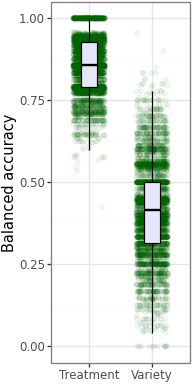

In [9]:
#%% plot accuracy scores
(ggplot(fulldata2, aes(x = 'variable', y = 'Accuracy'))
 + geom_jitter(width = 0.25, alpha = 0.05, color = "darkgreen")
 + geom_boxplot(width = 0.25, color = "black", fill = "lavender", outlier_shape = 'x', outlier_colour = '') 
 + theme_bw()
 + theme(figure_size=(2, 4))
 + xlab("")
 + ylab("Balanced accuracy")
 )